# Dataset and Motivation

For this notebook we will be working with the Our World in Data COVID-19 Dataset. The data contains information about vaccinations, tests & positivity rates, hospitalization & ICU numbers, confirmed cases, confirmed deaths, and more in relation to the COVID-19 pandemic from around the world. The data is compiled from a number of sources, including the Ceter for Systems Science and Engineering at John Hopkins University, European Centre for Disease Prevention and Control, various governmental sources, official reports, and more. A full description of the data sources included in this dataset can be found at the official [Github Repository](https://github.com/owid/covid-19-data/tree/master/public/data/) for the dataset. While some variables are updated daily, others are updated weekly or periodically depending on the availability of data from the official sources.

## Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

In [3]:
covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [4]:
size = covid_data.shape
print("The dataset includes " + str(size[0]) + " observations of " + str(size[1]) + " features.")

The dataset includes 134670 observations of 67 features.


In [5]:
print("The features included in the dataset are: " + str(list(covid_data.columns)))

The features included in the dataset are: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'peo

# Research Question

How has COVID-19 spread since the first case was discovered? How has the trend changed since the introduction of key intervention measures such as social distancing, mask requirements, vaccinations, and more?

Checking the global spread of Covid-19 overtime

In [41]:
recent_case = covid_data.copy()
recent_case = recent_case.dropna(subset=['total_cases']).sort_values('date', ascending=False).drop_duplicates(['location'])

In [56]:
recent_case = recent_case[recent_case.iso_code.apply(lambda x: len(str(x)) <= 3)]

In [57]:
recent_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
134669,ZWE,Africa,Zimbabwe,2021-11-20,133615.0,22.0,31.714,4699.0,0.0,0.429,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
100461,RUS,Europe,Russia,2021-11-20,9135149.0,35896.0,36263.286,257891.0,1222.0,1210.857,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
9470,BHS,North America,Bahamas,2021-11-20,22655.0,0.0,11.857,671.0,0.0,0.857,...,3.1,20.4,NaN,2.90,73.92,0.814,NaN,NaN,NaN,NaN
95208,PNG,Oceania,Papua New Guinea,2021-11-20,34022.0,0.0,170.286,484.0,0.0,7.714,...,23.5,48.8,NaN,NaN,64.50,0.555,NaN,NaN,NaN,NaN
95832,PRY,South America,Paraguay,2021-11-20,462198.0,0.0,82.000,16354.0,0.0,10.857,...,5.0,21.6,79.602,1.30,74.25,0.728,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64009,KEN,Africa,Kenya,2021-11-20,254688.0,59.0,58.857,5325.0,0.0,1.286,...,1.2,20.4,24.651,1.40,66.70,0.601,NaN,NaN,NaN,NaN
64196,KIR,Oceania,Kiribati,2021-11-20,2.0,0.0,0.000,NaN,NaN,0.000,...,35.9,58.9,NaN,1.90,68.37,0.630,NaN,NaN,NaN,NaN
16777,BWA,Africa,Botswana,2021-11-20,194445.0,0.0,106.286,2416.0,0.0,0.714,...,5.7,34.4,NaN,1.80,69.59,0.735,NaN,NaN,NaN,NaN
80185,MDA,Europe,Moldova,2021-11-20,357831.0,620.0,737.286,8799.0,43.0,50.429,...,5.9,44.6,86.979,5.80,71.90,0.750,NaN,NaN,NaN,NaN


In [59]:
# Using choropleth map to show the global spread of COVID-19 overtime
world_map = dict(type='choropleth', locations = recent_case['location'],locationmode='country names',z=recent_case['total_cases'])
layout = dict(title='Global spread of COVID-19',geo=dict(scope = "world",projection={'type':'natural earth'}))
g = pg.Figure(data = [world_map] ,layout = layout)
po.iplot(g)

# Data Cleaning

In [60]:
covid_data.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130700,VEN,South America,Venezuela,2020-04-19,256.0,29.0,10.714,9.0,0.0,0.000,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
88202,NER,Africa,Niger,2021-05-07,5310.0,24.0,11.714,192.0,0.0,0.143,...,0.1,15.4,8.978,0.3,62.42,0.394,NaN,NaN,NaN,NaN
20704,KHM,Asia,Cambodia,2021-11-07,119092.0,71.0,81.429,2829.0,5.0,5.857,...,2.0,33.7,66.229,0.8,69.82,0.594,NaN,NaN,NaN,NaN
43803,GAB,Africa,Gabon,2020-11-25,9173.0,23.0,12.714,59.0,0.0,0.143,...,NaN,NaN,NaN,6.3,66.47,0.703,NaN,NaN,NaN,NaN
81283,MNG,Asia,Mongolia,2021-06-19,91151.0,0.0,2465.000,425.0,0.0,10.571,...,5.5,46.5,71.180,7.0,69.87,0.737,NaN,NaN,NaN,NaN


We will narrow our dataset to only focus on US data.

In [61]:
us_data = covid_data[covid_data['iso_code'] == 'USA'].reset_index()

In [62]:
us_data.shape

(669, 68)

We can drop some columns that are not relevant to our analysis.

In [63]:
us_data.drop(columns=['index', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'iso_code', 'continent', 'location', 'gdp_per_capita', 'extreme_poverty'], inplace=True)

Lets check the values of the remaining columns to verify whether there is any other data cleaning for us to do.

In [64]:
stats = us_data.describe()
stats

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.690000e+02,668.000000,631.000000,631.000000,669.000000,668.00000,631.000000,631.000000,616.000000,493.000000,...,669.000,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,0.0,669.00,669.00,6.690000e+02
mean,1.931734e+07,71409.986527,378083.038035,1221.890650,58024.834045,214.49910,1135.674114,3.670273,1.120308,14099.462475,...,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.77,78.86,9.260000e-01
std,1.592917e+07,65870.243313,238944.136841,949.065798,47847.552740,197.85900,717.733021,2.850787,0.474015,7205.555200,...,0.000,1.777686e-15,5.688595e-14,1.777686e-15,3.555372e-15,3.555372e-15,NaN,0.00,0.00,2.222107e-16
min,1.000000e+00,0.000000,1.000000,0.000000,0.003000,0.00000,0.003000,0.000000,0.710000,3525.000000,...,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.77,78.86,9.260000e-01
25%,3.004051e+06,25676.250000,157922.000000,496.000000,9023.475000,77.12575,474.361500,1.490000,0.910000,8624.000000,...,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.77,78.86,9.260000e-01
50%,1.819917e+07,49456.500000,378965.000000,973.000000,54666.095000,148.55550,1138.323000,2.923000,1.010000,11732.000000,...,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.77,78.86,9.260000e-01
75%,3.344050e+07,95322.000000,599991.500000,1732.000000,100447.530000,286.32550,1802.236000,5.203000,1.140000,19863.000000,...,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.77,78.86,9.260000e-01
max,4.770187e+07,303492.000000,771013.000000,4442.000000,143285.407000,911.62000,2315.945000,13.343000,3.650000,28891.000000,...,15.413,9.732000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.77,78.86,9.260000e-01


In [65]:
range0 = stats.apply(lambda x: x['min'] == x['max'])
range0[range0 == True]

population                    True
population_density            True
median_age                    True
aged_65_older                 True
aged_70_older                 True
cardiovasc_death_rate         True
diabetes_prevalence           True
female_smokers                True
male_smokers                  True
hospital_beds_per_thousand    True
life_expectancy               True
human_development_index       True
dtype: bool

We see that some variables/features in the data contain only one value across all observations. For most of these features, this makes them unusable for our analysis, so we will drop some more columns.

In [66]:
drop_cols = list(range0[range0 == True].index)
drop_cols.remove('hospital_beds_per_thousand')
us_data.drop(columns=drop_cols,inplace=True)

In [67]:
remaining = us_data.shape
print("We are left with " + str(remaining[0]) + " observations of " + str(remaining[1]) + " features.")

We are left with 669 observations of 39 features.


In [68]:
print("The remaining variables available to us to examine are: " + str(list(us_data.columns)))

The remaining variables available to us to examine are: ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'handwashing_facilities', 'hospital_beds_per_thousand']


In [69]:
us_data.dtypes

date                                           object
total_cases                                   float64
new_cases                                     float64
total_deaths                                  float64
new_deaths                                    float64
total_cases_per_million                       float64
new_cases_per_million                         float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million                      float64
hosp_patients                                 float64
hosp_patients_per_million                     float64
weekly_icu_admissions                         float64
weekly_icu_admissions_per_million             float64
weekly_hosp_admissions                        float64
weekly_hosp_admissions_per_million            float64
new_tests                   

We see that the date column is incorrectly typed -- we must correct this.

In [70]:
us_data['date'] = pd.to_datetime(us_data['date'], utc=False)

In [71]:
us_data.dtypes

date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
total_deaths                                         float64
new_deaths                                           float64
total_cases_per_million                              float64
new_cases_per_million                                float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
reproduction_rate                                    float64
icu_patients                                         float64
icu_patients_per_million                             float64
hosp_patients                                        float64
hosp_patients_per_million                            float64
weekly_icu_admissions                                float64
weekly_icu_admissions_per_million                    float64
weekly_hosp_admissions  

The date column is now properly typed.

In [72]:
us_data.isna().sum()

date                                            0
total_cases                                     0
new_cases                                       1
total_deaths                                   38
new_deaths                                     38
total_cases_per_million                         0
new_cases_per_million                           1
total_deaths_per_million                       38
new_deaths_per_million                         38
reproduction_rate                              53
icu_patients                                  176
icu_patients_per_million                      176
hosp_patients                                 176
hosp_patients_per_million                     176
weekly_icu_admissions                         669
weekly_icu_admissions_per_million             669
weekly_hosp_admissions                        600
weekly_hosp_admissions_per_million            600
new_tests                                      44
total_tests                                    44


The handwashing facilities, weekly_icu_admissions, and weekly_icu_admissions_per_million columns seem to only contain nulls, so we will drop them.

In [73]:
us_data.drop(columns=['handwashing_facilities','weekly_icu_admissions', 'weekly_icu_admissions_per_million'], inplace=True)

In [74]:
us_data[pd.isna(us_data['reproduction_rate'])]

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand
0,2020-01-22,1.0,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
1,2020-01-23,1.0,0.0,NaN,NaN,0.003,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
2,2020-01-24,2.0,1.0,NaN,NaN,0.006,0.003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
3,2020-01-25,2.0,0.0,NaN,NaN,0.006,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
4,2020-01-26,5.0,3.0,NaN,NaN,0.015,0.009,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
5,2020-01-27,5.0,0.0,NaN,NaN,0.015,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
6,2020-01-28,5.0,0.0,NaN,NaN,0.015,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
7,2020-01-29,6.0,1.0,NaN,NaN,0.018,0.003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
8,2020-01-30,6.0,0.0,NaN,NaN,0.018,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77
9,2020-01-31,8.0,2.0,NaN,NaN,0.024,0.006,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.77


We can replace most of the null values with 0s with the exception of the reproduction_rate column. For the rest of the columns, the nulls appear in locations where no data was available for that particular metric, which in this case implies a zero. However, for the reproduction_rate, it is more complicated and indicates that we did not have enough data to calculate the correct rate. We will leave these nulls in our data.

In [75]:
cols = list(us_data.columns)
cols.remove('reproduction_rate')
us_data[cols] = us_data[cols].fillna(0)
us_data.isna().sum()

date                                           0
total_cases                                    0
new_cases                                      0
total_deaths                                   0
new_deaths                                     0
total_cases_per_million                        0
new_cases_per_million                          0
total_deaths_per_million                       0
new_deaths_per_million                         0
reproduction_rate                             53
icu_patients                                   0
icu_patients_per_million                       0
hosp_patients                                  0
hosp_patients_per_million                      0
weekly_hosp_admissions                         0
weekly_hosp_admissions_per_million             0
new_tests                                      0
total_tests                                    0
total_tests_per_thousand                       0
new_tests_per_thousand                         0
positive_rate       

reproduction_rate is now the only column with nulls contained.

## Feature Engineering

Since we are interested in looking at the changes in trends given the implementation of various intervention measures, we will add indicator columns to understand which measures were in place for each observation. Specifically, we will look at when social distancing measures were implemented, stay at home orders were issued, mask mandates were announced, and vaccinations became available, the Delta variant appeared.

- According to the [Kaiser Family Foundation](https://www.kff.org/policy-watch/stay-at-home-orders-to-fight-covid19/), the first stay at home order was announced in  King County in Washington state on March 4, 2020
- According to [NPR](https://www.npr.org/2020/03/16/816658125/white-house-announces-new-social-distancing-guidelines-around-coronavirus), the White House announced social distancing guidelines on March 16, 2020.
- According to [Wikipedia](https://en.wikipedia.org/wiki/Face_masks_during_the_COVID-19_pandemic_in_the_United_States#Timeline), the CDC issued the first federal guidance recommending non-medical face coverings to be worn on April 3, 2020.
- According to the [FDA](<https://www.fda.gov/emergency-preparedness-and-response/coronavirus-disease-2019-covid-19/covid-19-frequently-asked-questions#:~:text=On%20December%2011%2C%202020,%29%20of%20a%20vaccine.>), the first Emergency Use Authorization for a COVID vaccine was granted on December 11, 2020 for the Pfizer-BioNTech Vaccine.
-According to the [The NY Times](https://www.nytimes.com/2021/06/22/health/delta-variant-covid.html), the Delta variant was first identified in the United States in March 2021.
- On July 27, 2021 the [CDC](https://www.cdc.gov/coronavirus/2019-ncov/variants/delta-variant.html) released updated guidance on the need for urgently increasing COVID-19 vaccination coverage and a recommendation for everyone in areas of substantial or high transmission to wear a mask in public indoor places, even if they are fully vaccinated.

In [77]:
us_data['stay_at_home'] = us_data['date'] > '2020-03-04'
us_data['social_distancing'] = us_data['date'] > '2020-03-16'
us_data['face_covering'] = us_data['date'] > '2020-04-04'
us_data['vaccines'] = us_data['date'] > '2020-12-11'
us_data['delta_var'] = us_data['date'] > '2021-03-01'
us_data['urgent_vax'] = us_data['date'] > '2021-07-27'

In [78]:
us_data.sample(5)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,hospital_beds_per_thousand,stay_at_home,social_distancing,face_covering,vaccines,delta_var,urgent_vax
341,2020-12-28,19481171.0,166685.0,340878.0,1877.0,58516.939,500.683,1023.919,5.638,1.00,...,287380.0,0.085,71.76,2.77,True,True,True,True,False,False
316,2020-12-03,14309483.0,224160.0,279178.0,2969.0,42982.382,673.325,838.586,8.918,1.14,...,0.0,0.000,71.76,2.77,True,True,True,False,False,False
161,2020-07-01,2694045.0,51566.0,128063.0,698.0,8092.289,154.892,384.672,2.097,1.27,...,0.0,0.000,68.98,2.77,True,True,True,False,False,False
153,2020-06-23,2348118.0,37222.0,123691.0,739.0,7053.204,111.806,371.539,2.220,1.29,...,0.0,0.000,68.98,2.77,True,True,True,False,False,False
552,2021-07-27,34694692.0,68736.0,611217.0,449.0,104214.842,206.467,1835.955,1.349,1.48,...,387377.0,0.115,49.54,2.77,True,True,True,True,True,False


In [79]:
def determine_measures(row):
    measures = ''
    for col in ['stay_at_home', 'social_distancing', 'face_covering', 'vaccines', 'delta_var', 'urgent_vax']:
        if row[col]:
            measures = measures + col + " | "

    return measures[:-3]

In [80]:
us_data['prevention_measures'] = us_data.apply(determine_measures, axis=1)

In [81]:
us_data[['stay_at_home', 'social_distancing', 'face_covering', 'vaccines', 'delta_var', 'urgent_vax', 'prevention_measures']].sample(10)

,stay_at_home,social_distancing,face_covering,vaccines,delta_var,urgent_vax,prevention_measures
192,True,True,True,False,False,False,stay_at_home | social_distancing | face_covering
338,True,True,True,True,False,False,stay_at_home | social_distancing | face_coveri...
208,True,True,True,False,False,False,stay_at_home | social_distancing | face_covering
34,False,False,False,False,False,False,
19,False,False,False,False,False,False,
433,True,True,True,True,True,False,stay_at_home | social_distancing | face_coveri...
372,True,True,True,True,False,False,stay_at_home | social_distancing | face_coveri...
82,True,True,True,False,False,False,stay_at_home | social_distancing | face_covering
490,True,True,True,True,True,False,stay_at_home | social_distancing | face_coveri...
452,True,True,True,True,True,False,stay_at_home | social_distancing | face_coveri...


# Visualization

In [82]:
us_data.dtypes

date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
total_deaths                                         float64
new_deaths                                           float64
total_cases_per_million                              float64
new_cases_per_million                                float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
reproduction_rate                                    float64
icu_patients                                         float64
icu_patients_per_million                             float64
hosp_patients                                        float64
hosp_patients_per_million                            float64
weekly_hosp_admissions                               float64
weekly_hosp_admissions_per_million                   float64
new_tests               

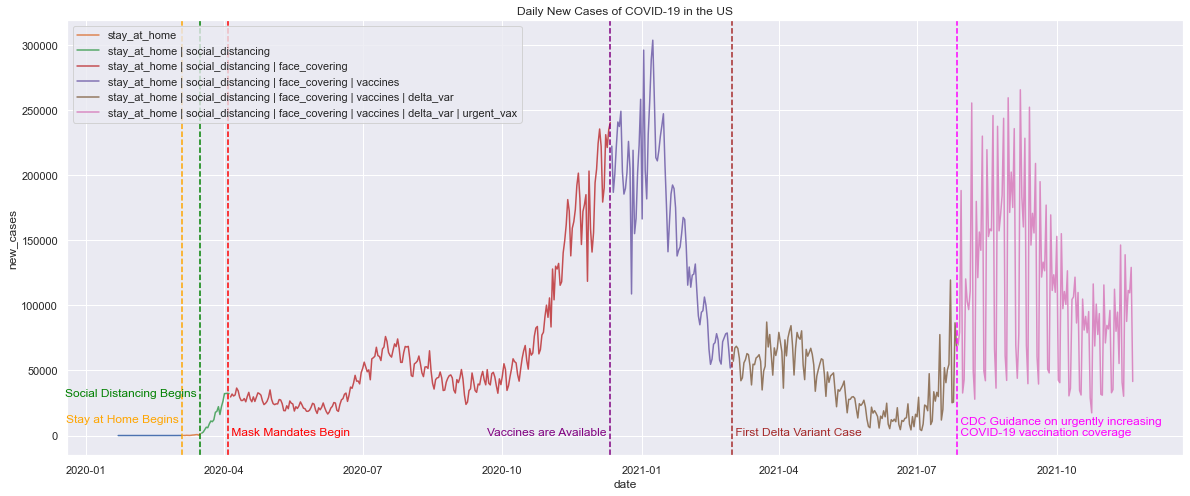

In [115]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='new_cases', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 10000), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 30000), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 0), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate('Vaccines are Available ', (pd.to_datetime('2020-12-11'), 0), ha='right',color='purple')
plt.axvline(x=pd.to_datetime('2021-03-01'), color='brown', linestyle='--')
plt.annotate(' First Delta Variant Case', (pd.to_datetime('2021-03-01'), 0), color='brown')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='magenta', linestyle='--')
plt.annotate(' CDC Guidance on urgently increasing \n COVID-19 vaccination coverage', (pd.to_datetime('2021-07-27'), 0), color='magenta')
plt.title("Daily New Cases of COVID-19 in the US")
plt.legend(loc='upper left')

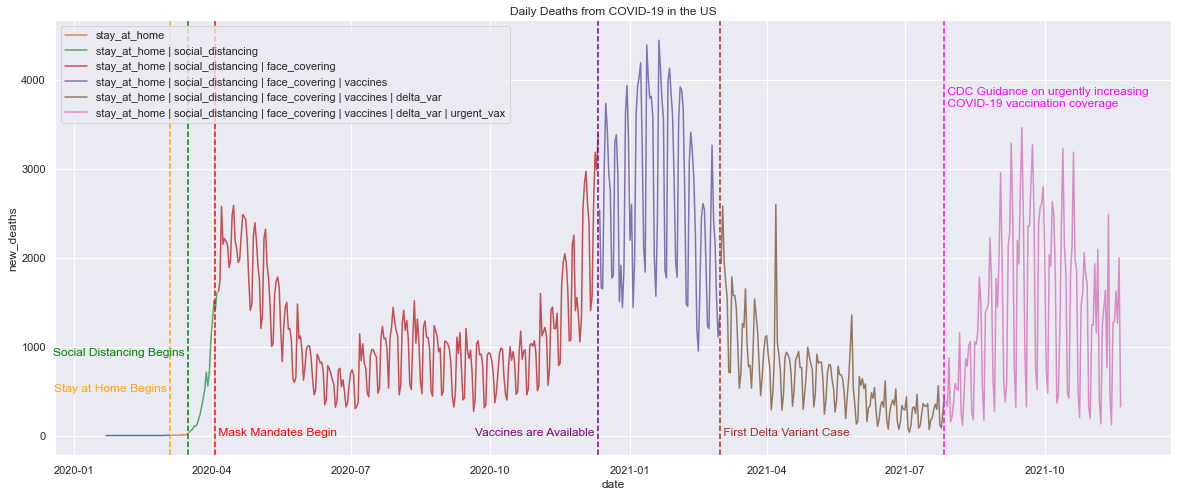

In [111]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='new_deaths', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 500), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 900), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 0), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate('Vaccines are Available ', (pd.to_datetime('2020-12-11'), 0), ha='right',color='purple')
plt.axvline(x=pd.to_datetime('2021-03-01'), color='brown', linestyle='--')
plt.annotate(' First Delta Variant Case', (pd.to_datetime('2021-03-01'), 0), color='brown')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='magenta', linestyle='--')
plt.annotate(' CDC Guidance on urgently increasing \n COVID-19 vaccination coverage', (pd.to_datetime('2021-07-27'), 3700), color='magenta')
plt.title("Daily Deaths from COVID-19 in the US")
plt.legend(loc='upper left')

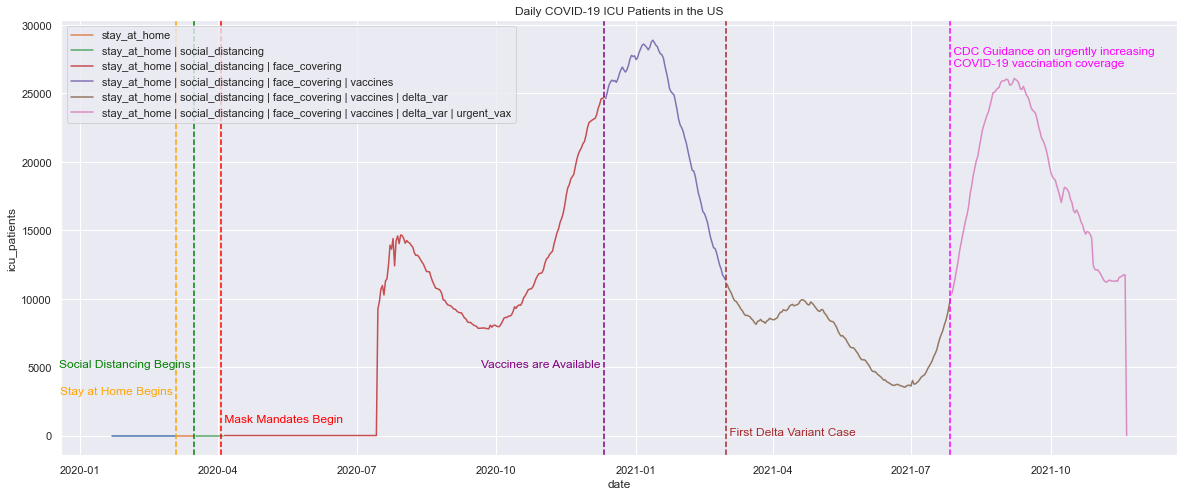

In [112]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='icu_patients', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 3000), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 5000), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 1000), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate('Vaccines are Available ', (pd.to_datetime('2020-12-11'), 5000), color='purple', ha='right')
plt.axvline(x=pd.to_datetime('2021-03-01'), color='brown', linestyle='--')
plt.annotate(' First Delta Variant Case', (pd.to_datetime('2021-03-01'), 0), color='brown')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='magenta', linestyle='--')
plt.annotate(' CDC Guidance on urgently increasing \n COVID-19 vaccination coverage', (pd.to_datetime('2021-07-27'), 27000), color='magenta')
plt.title("Daily COVID-19 ICU Patients in the US")
plt.legend(loc='upper left')

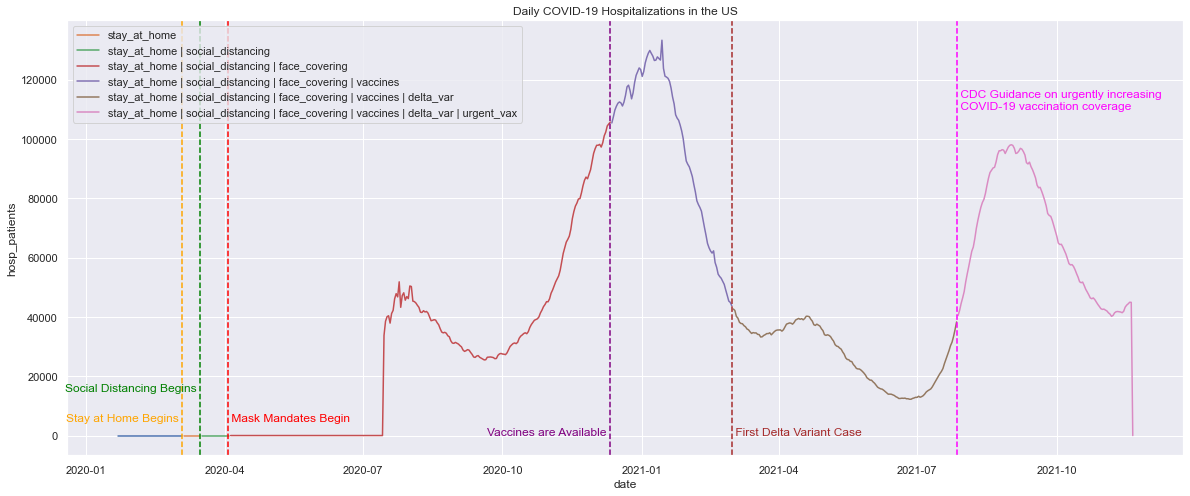

In [113]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='hosp_patients', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 5000), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 15000), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 5000), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate('Vaccines are Available ', (pd.to_datetime('2020-12-11'), 0), ha='right', color='purple')
plt.axvline(x=pd.to_datetime('2021-03-01'), color='brown', linestyle='--')
plt.annotate(' First Delta Variant Case', (pd.to_datetime('2021-03-01'), 0), color='brown')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='magenta', linestyle='--')
plt.annotate(' CDC Guidance on urgently increasing \n COVID-19 vaccination coverage', (pd.to_datetime('2021-07-27'), 110000), color='magenta')
plt.title("Daily COVID-19 Hospitalizations in the US")
plt.legend(loc='upper left')

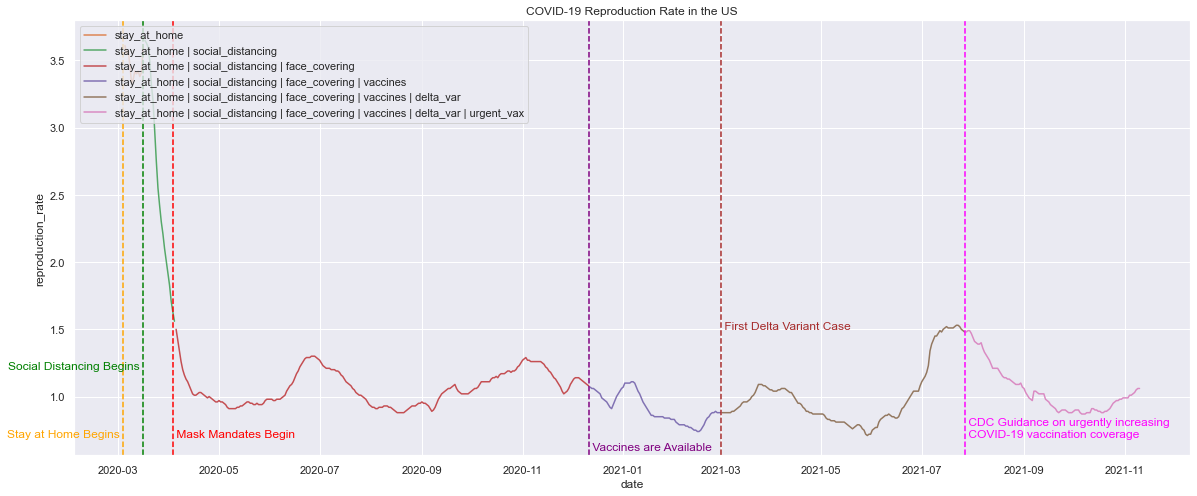

In [116]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='date', y='reproduction_rate', hue='prevention_measures', data=us_data)
plt.axvline(x=pd.to_datetime('2020-03-04'), color='orange', linestyle='--')
plt.annotate('Stay at Home Begins ', (pd.to_datetime('2020-03-04'), 0.7), ha='right', color='orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), color='green', linestyle='--')
plt.annotate('Social Distancing Begins ', (pd.to_datetime('2020-03-16'), 1.2), ha='right', color='green')
plt.axvline(x=pd.to_datetime('2020-04-03'), color='red', linestyle='--')
plt.annotate(' Mask Mandates Begin', (pd.to_datetime('2020-04-03'), 0.7), color='red')
plt.axvline(x=pd.to_datetime('2020-12-11'), color='purple', linestyle='--')
plt.annotate(' Vaccines are Available', (pd.to_datetime('2020-12-11'), 0.6), color='purple')
plt.axvline(x=pd.to_datetime('2021-03-01'), color='brown', linestyle='--')
plt.annotate(' First Delta Variant Case', (pd.to_datetime('2021-03-01'), 1.5), color='brown')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='magenta', linestyle='--')
plt.annotate(' CDC Guidance on urgently increasing \n COVID-19 vaccination coverage', (pd.to_datetime('2021-07-27'), 0.7), color='magenta')
plt.title("COVID-19 Reproduction Rate in the US")
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Daily New Cases of COVID-19 in the US vs Number of Fully Vaccinated People')

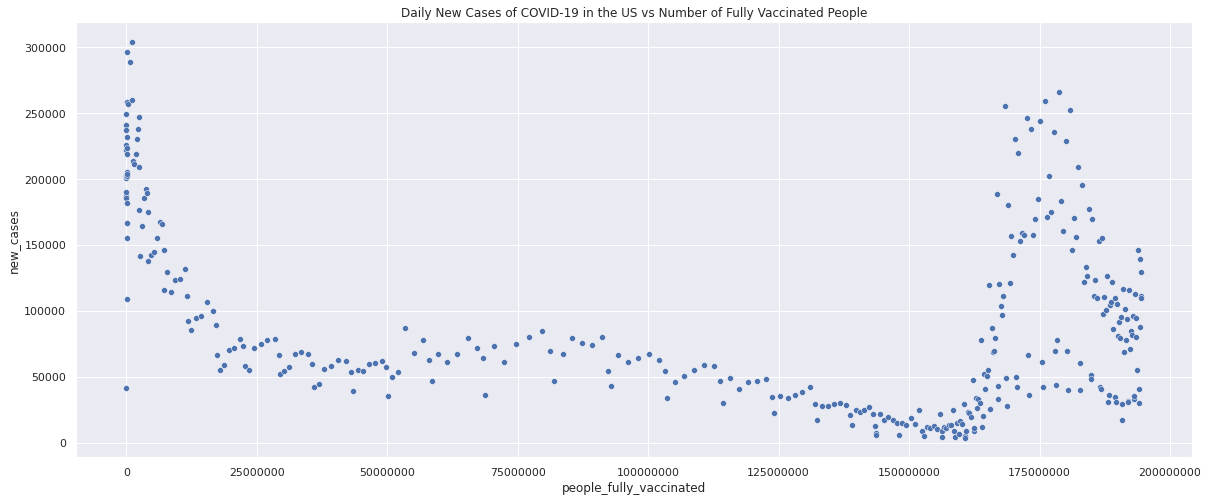

In [33]:
sns.scatterplot(x='people_fully_vaccinated', y='new_cases', data=us_data[us_data['vaccines'] == True])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Daily New Cases of COVID-19 in the US vs Number of Fully Vaccinated People")

Text(0.5, 1.0, 'Daily New Cases of COVID-19 in the US vs Number of Vaccinated People (At least 1 shot)')

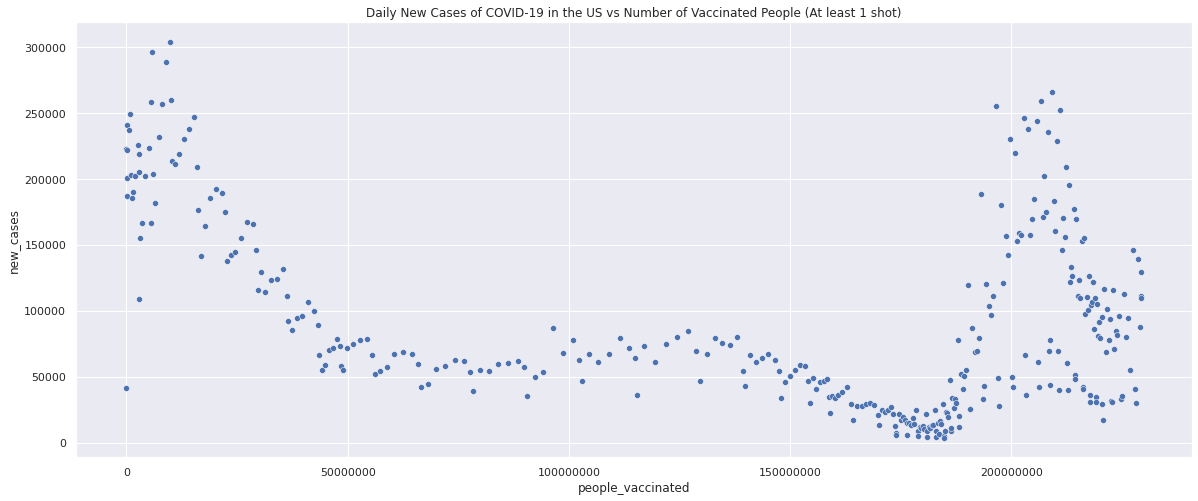

In [34]:
sns.scatterplot(x='people_vaccinated', y='new_cases', data=us_data[us_data['vaccines'] == True])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Daily New Cases of COVID-19 in the US vs Number of Vaccinated People (At least 1 shot)")

Text(0.5, 1.0, 'COVID-19 Test Positivity Rate in the US vs Number of Fully Vaccinated People')

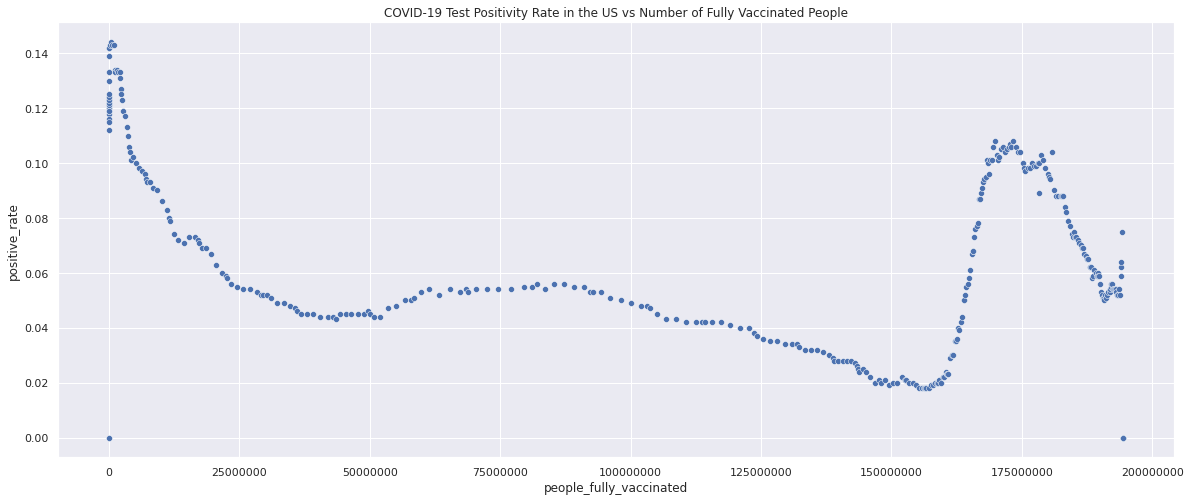

In [35]:
sns.scatterplot(x='people_fully_vaccinated', y='positive_rate', data=us_data[us_data['vaccines'] == True])
plt.ticklabel_format(style='plain', axis='x')
plt.title("COVID-19 Test Positivity Rate in the US vs Number of Fully Vaccinated People")

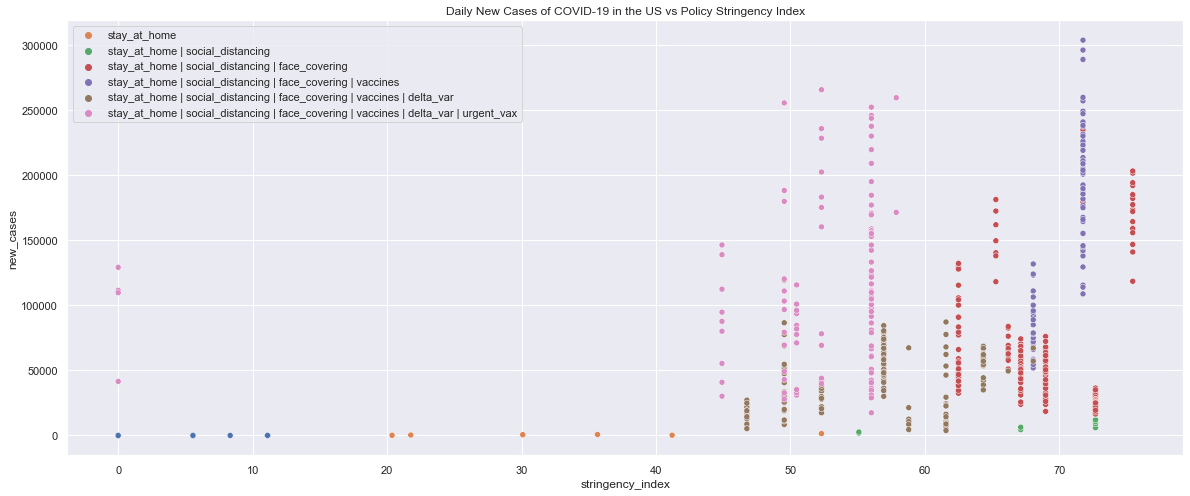

In [109]:
sns.scatterplot(x='stringency_index', y='new_cases', data=us_data, hue='prevention_measures')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Daily New Cases of COVID-19 in the US vs Policy Stringency Index")
plt.legend(loc='upper left')

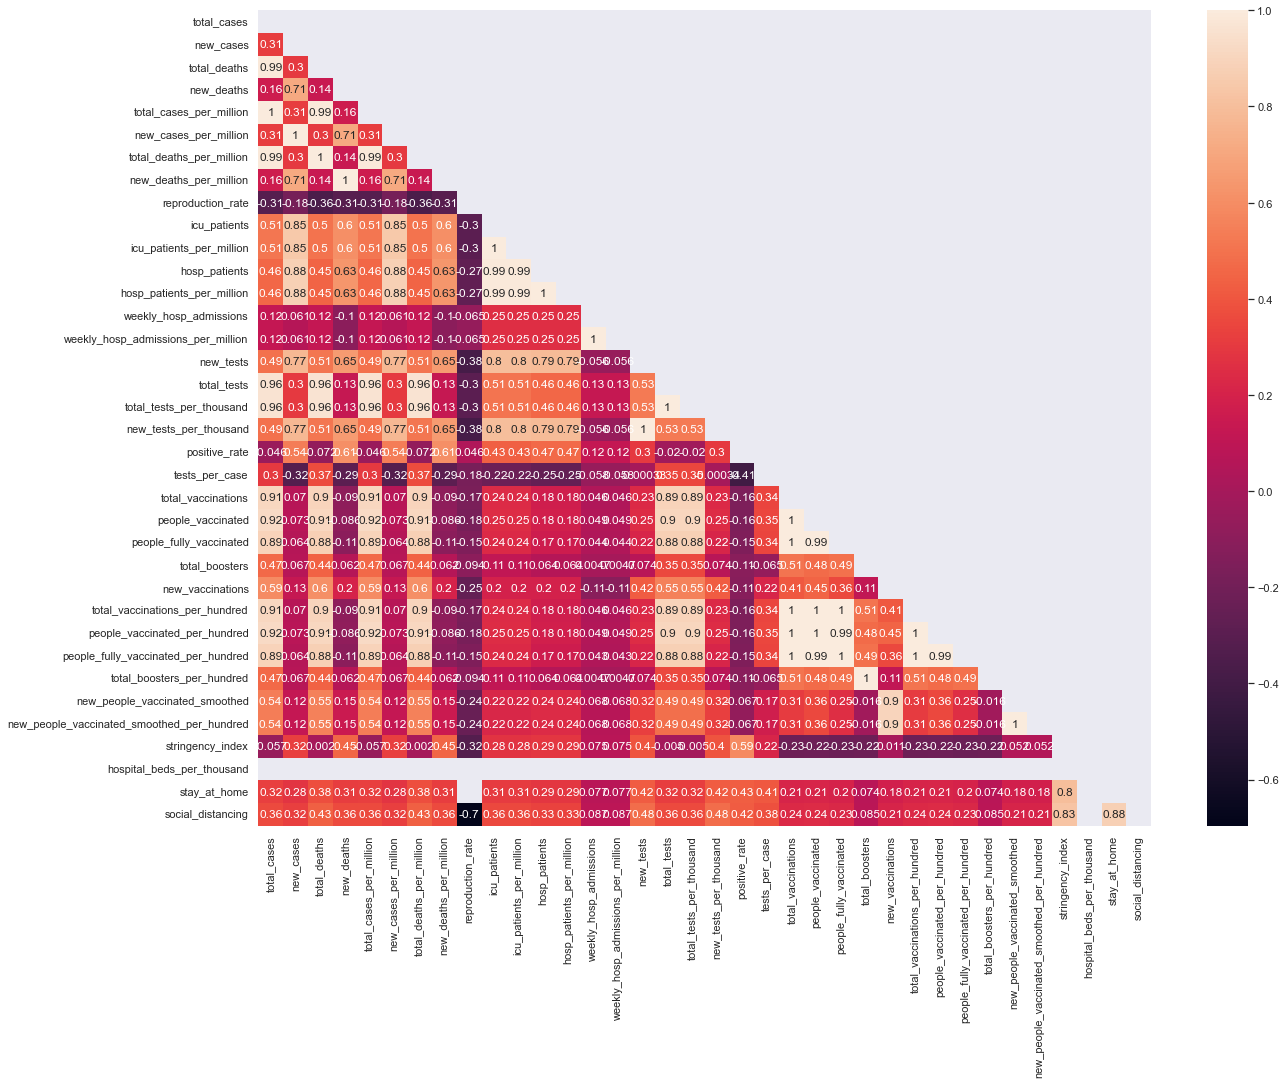

In [110]:
sns.set(rc={'figure.figsize':(20,15)})
corr = us_data.iloc[:,:-5].corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, mask=np.triu(corr))